1.Construya la señal z(t) = x(t) + y(t) usando señales básicas (10%)

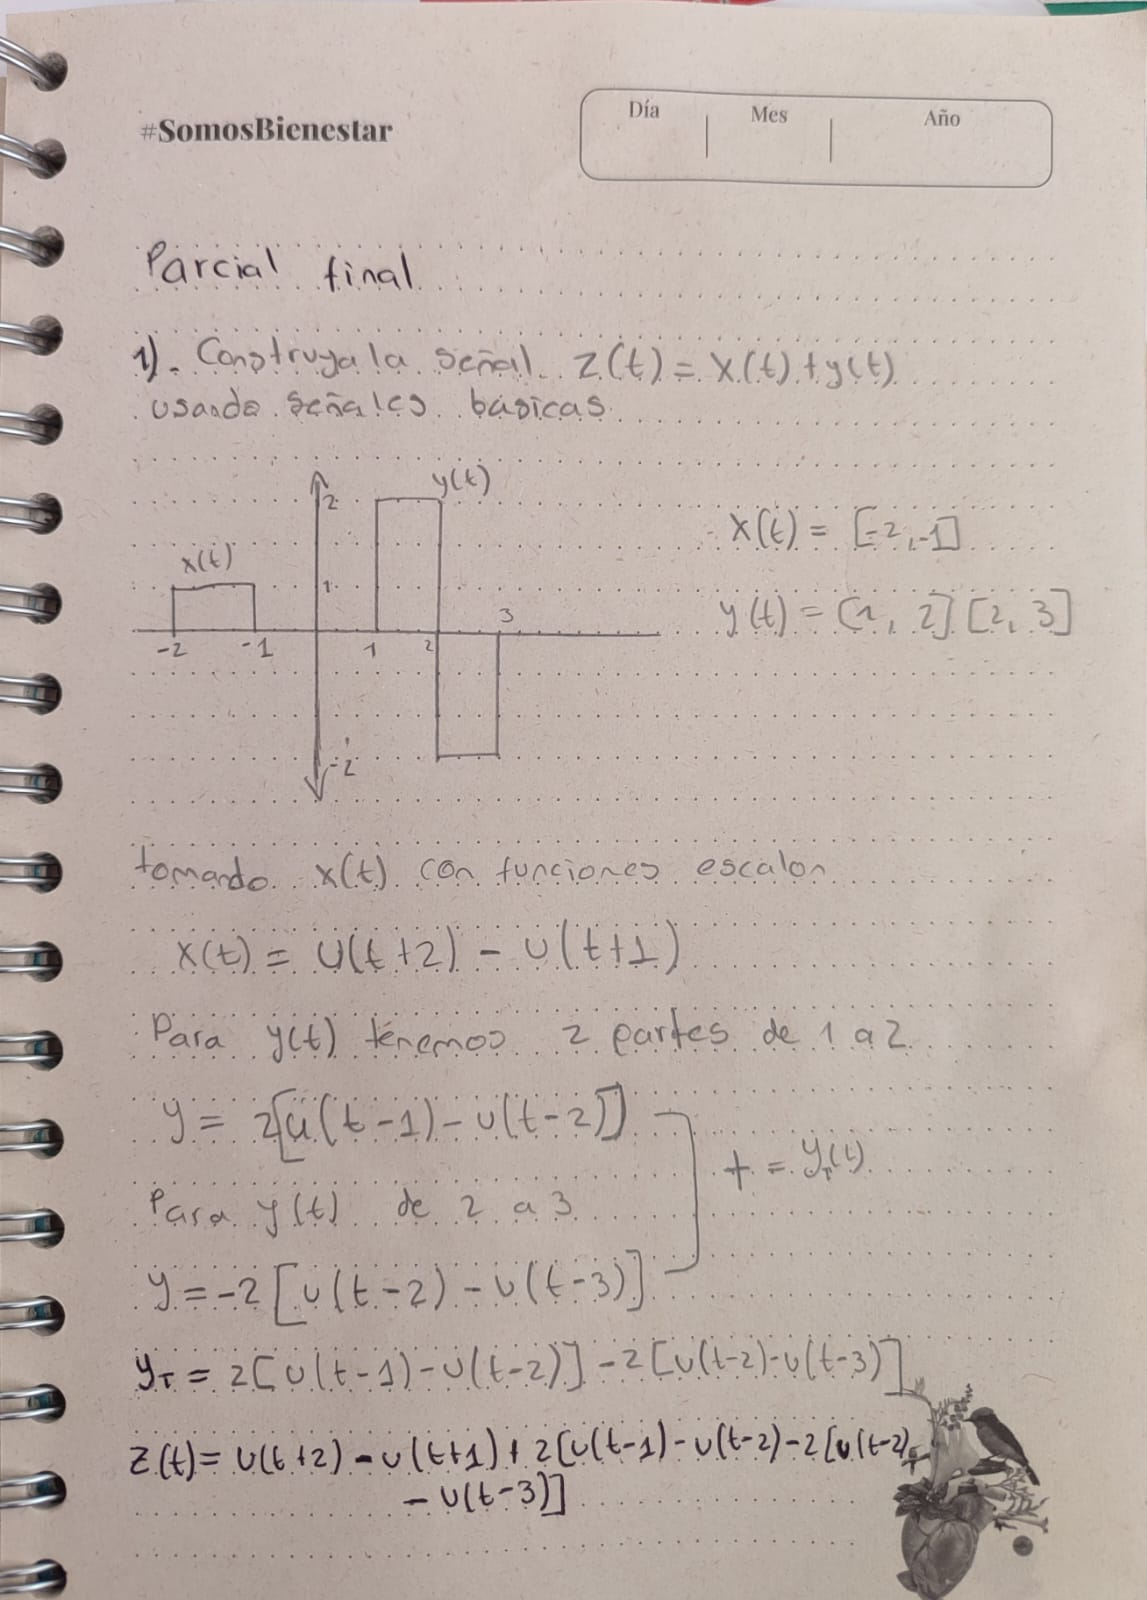

2. Grafique w(t) = z(t)*r(2(t + k) - 6) Con k = 2(a+1) con a = último número de la cédula
(10%)
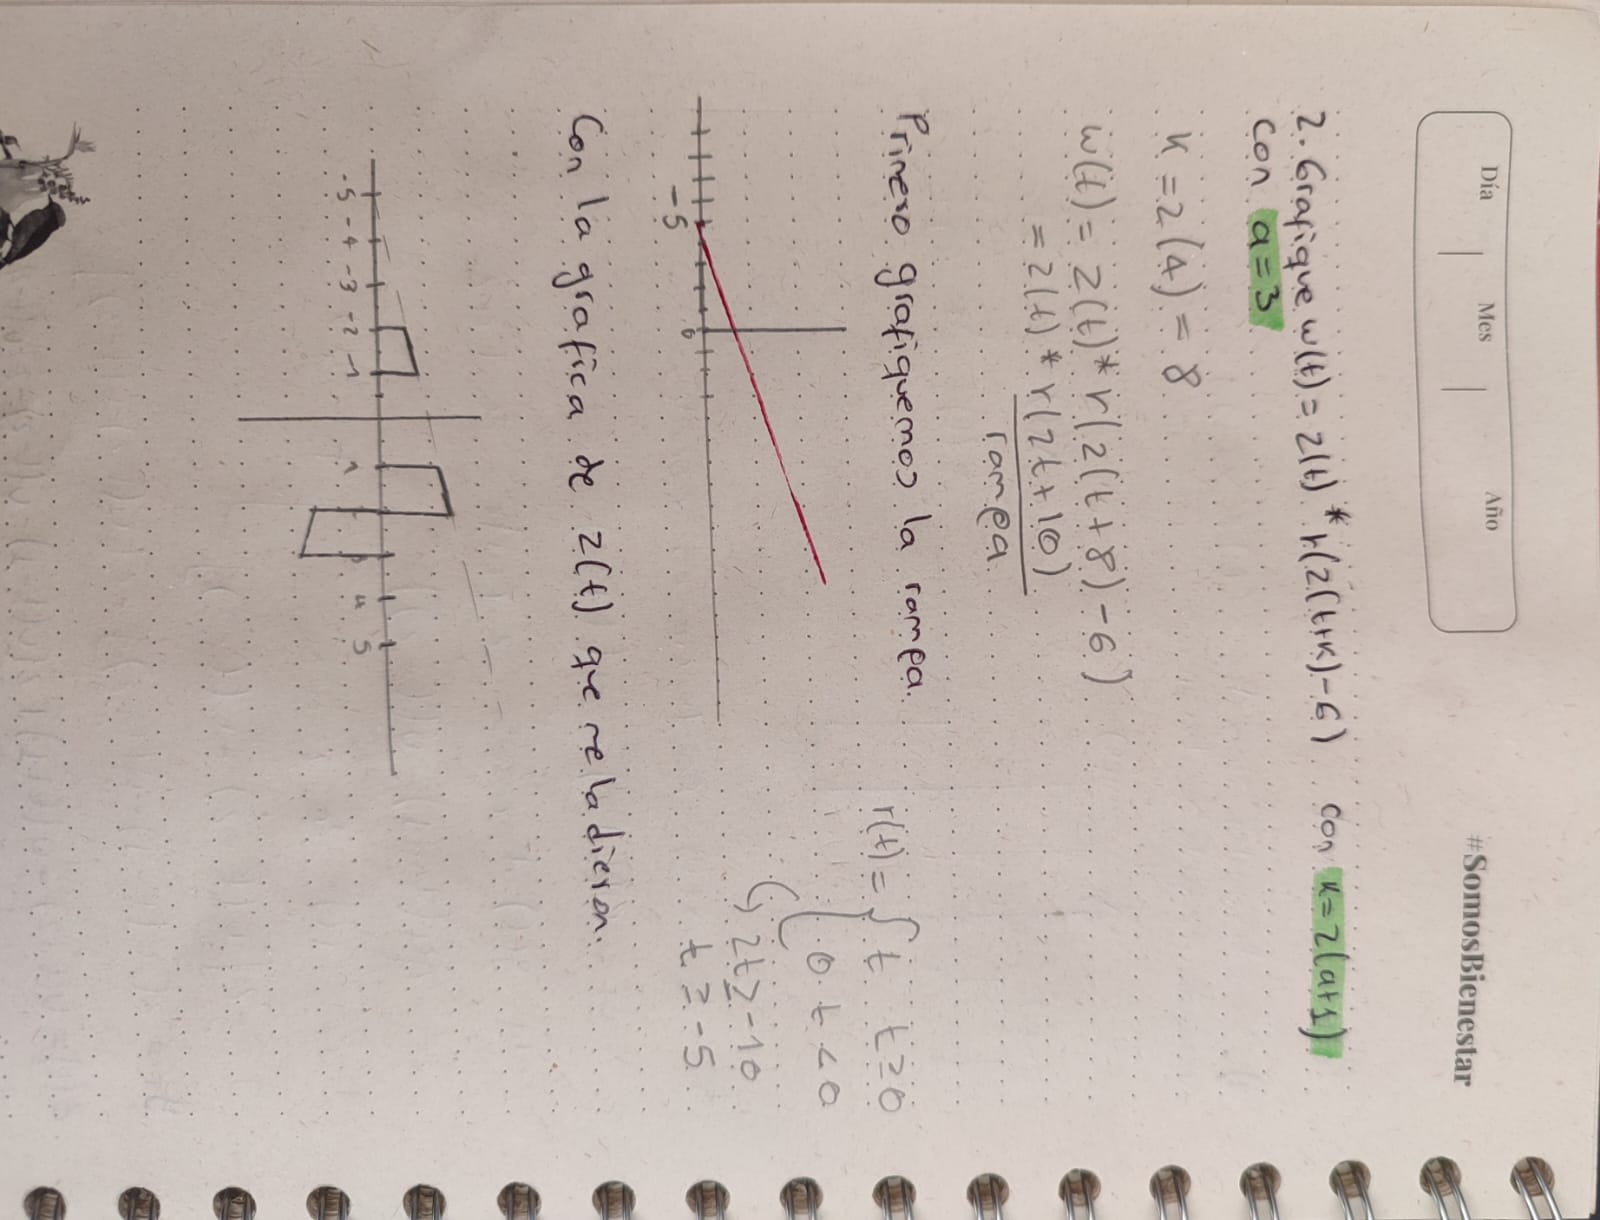

3. 3 Encontrar la transformada de Fourier de la siguiente señal (10%)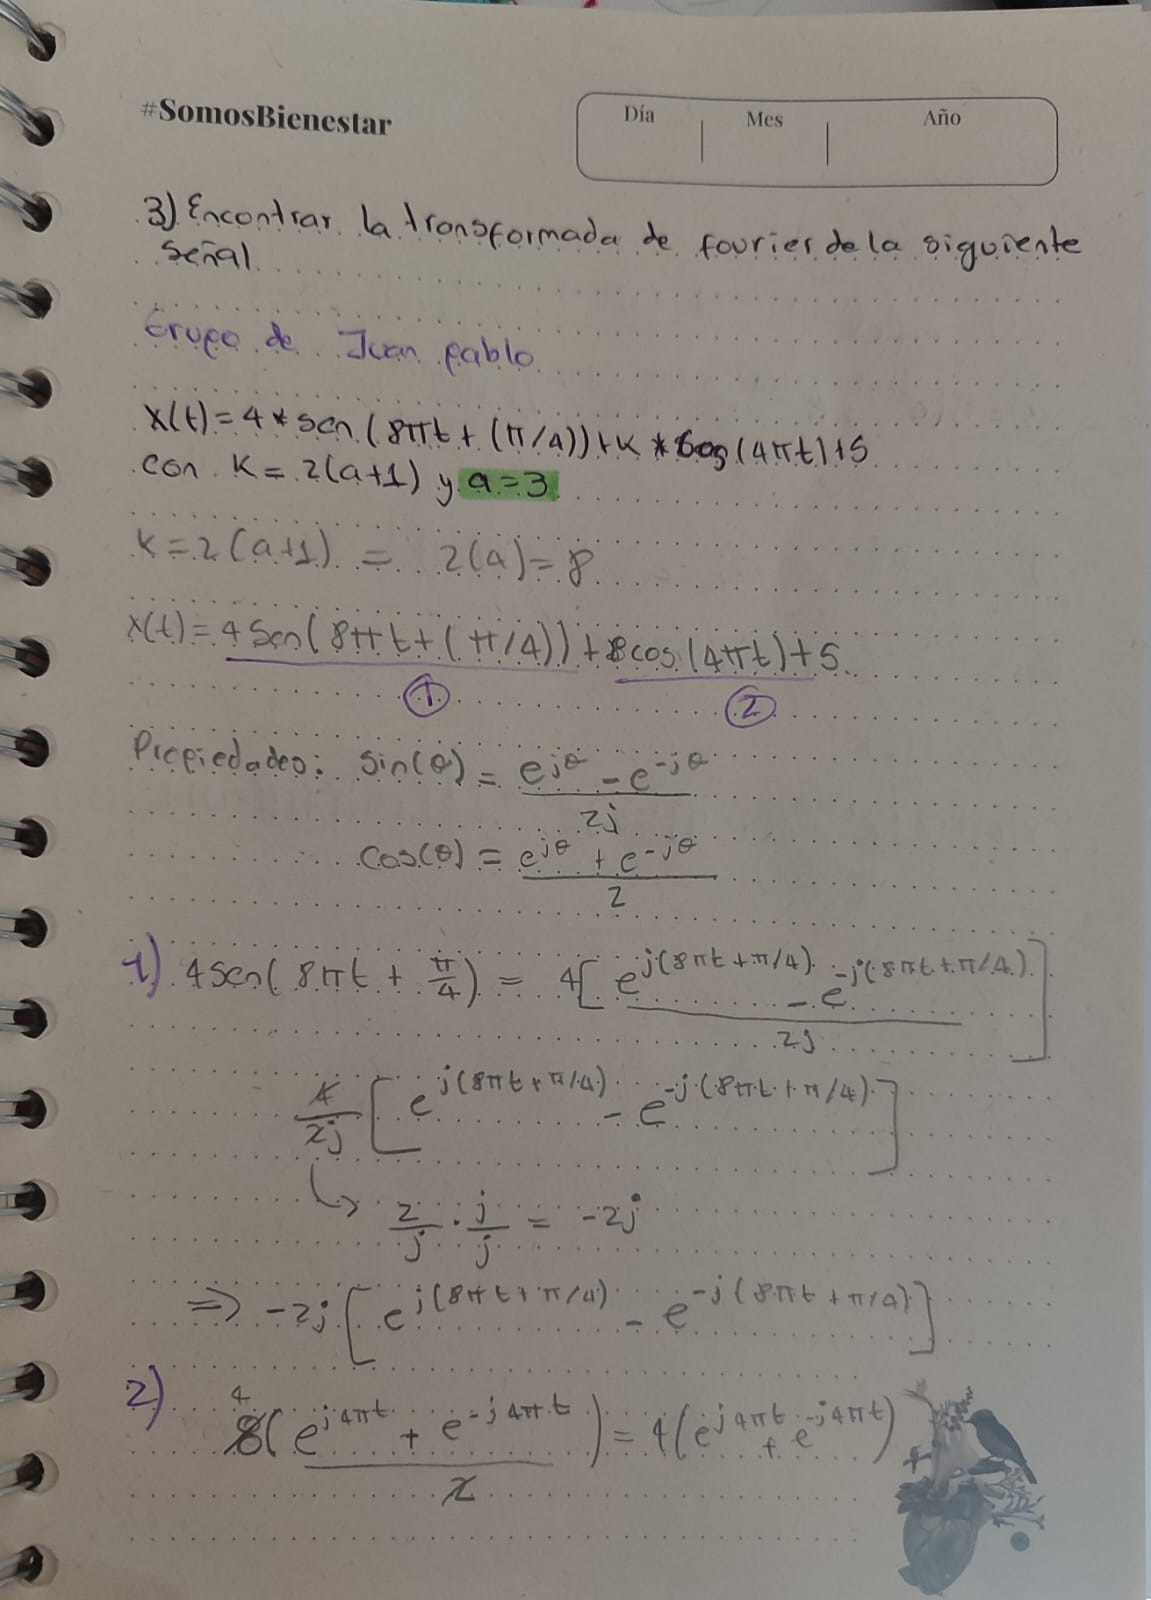

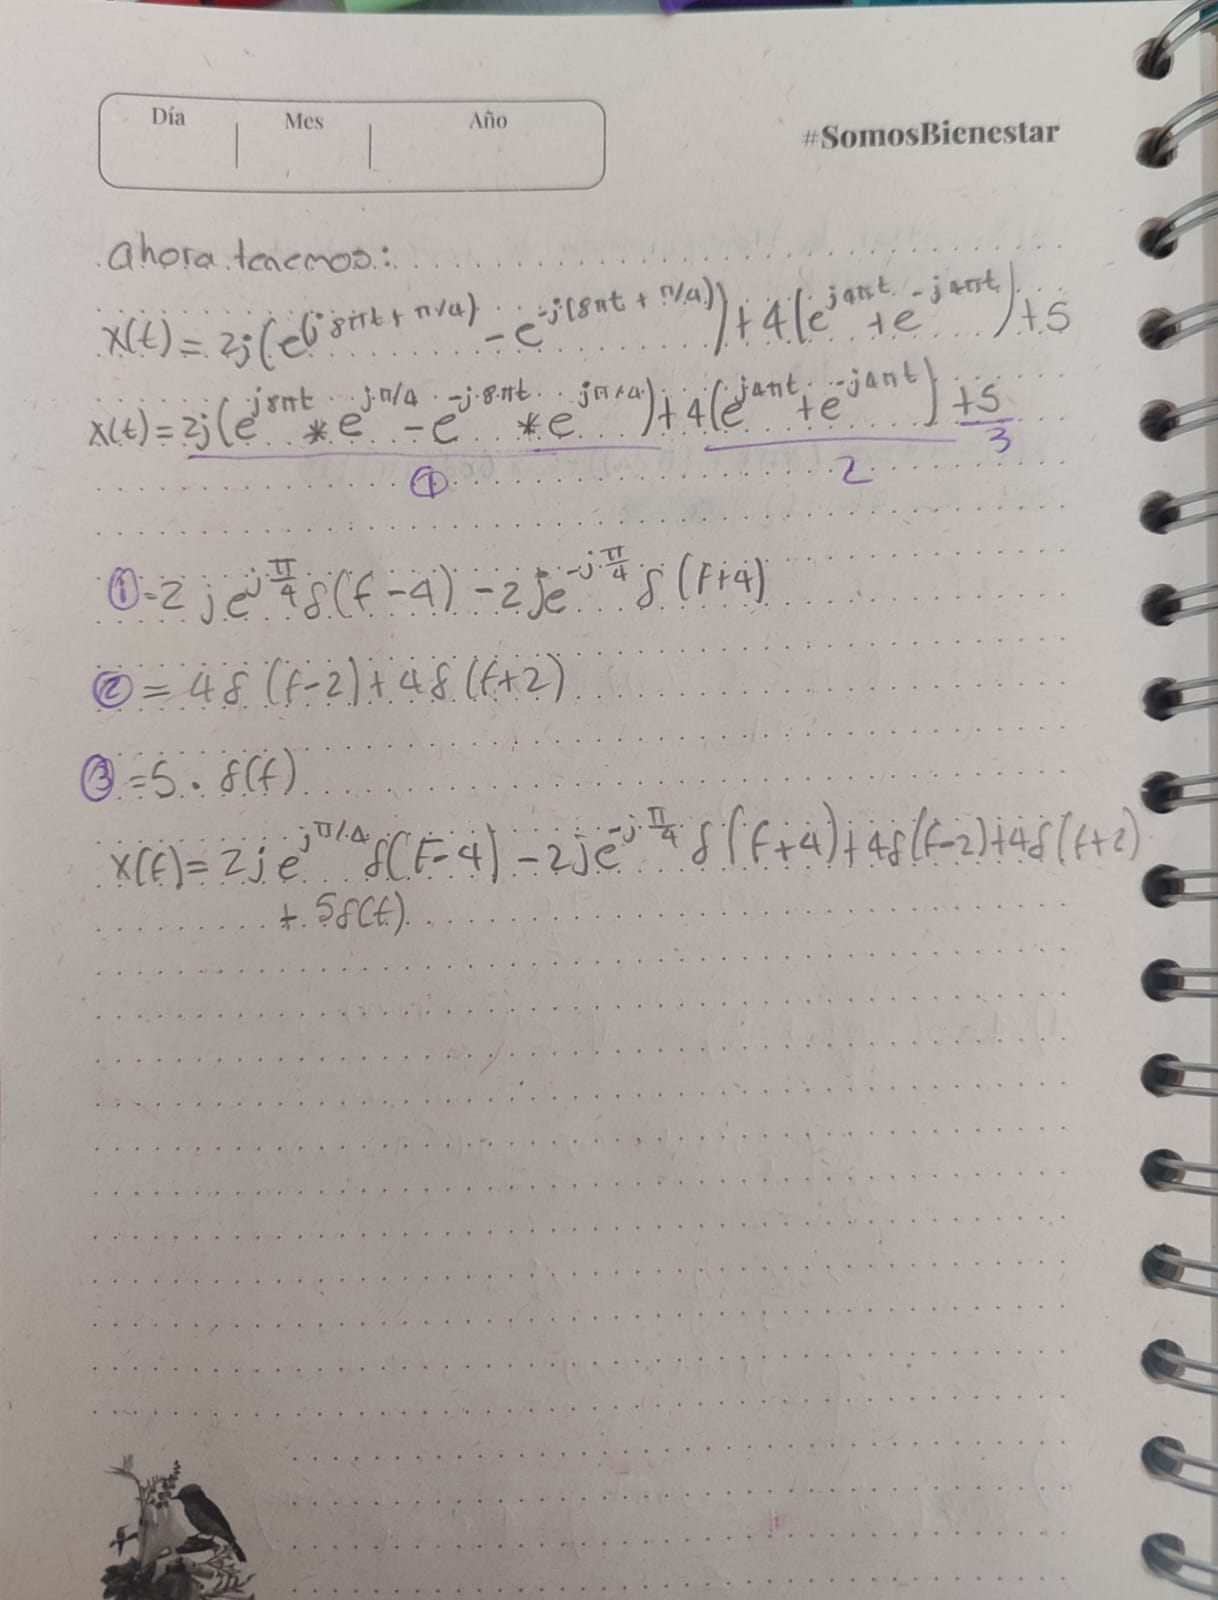

4. Definir la frecuencia de muestreo para la siguiente señal y obtener las muestras de 10
segundos de la señal usando Colab (10%)

x(t)= 4 ∗sen(80πt + (π /4))+ k ∗ cos(40πt)+ 5 Con k = 2(a+1) con a = 3

Para: sin (80𝜋𝑡+𝜋4) La frec es 80𝜋 entonces 𝑓=40 Hz.

Para cos(40𝜋𝑡) La frec 40𝜋 entonces 𝑓=20 Hz

Fs=2*40=80Hz por nyquist

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fs=80*3# 3 veces la frec de nyquist
tsen =10
t=np.arange(0,tsen,1/fs)

x= 4 * np.sin(80*np.pi*t + np.pi/4)+8*np.cos(40*np.pi*t)+5

5. Programar el periodograma de Welch (NO usar la función de scipy) mediante una función
que:

A) reciba la señal x y haga la partición de la misma usando M muestras por segmento y S muestras
de solapamiento (5%)

In [7]:
import numpy as np

def particionar_señal(x, M, S):
    N = len(x)
    K = int(np.floor((N - M) / S) + 1)
    segmentos = []

    for k in range(K):
        inicio = k * S
        fin = inicio + M
        if fin > N:
            fin = N
        segmentos.append(x[inicio:fin])
    return segmentos

M = 200
S = 100

segmentos = particionar_señal(x, M, S)

for i, segmento in enumerate(segmentos[:2]):
    print(f"Segmento {i+1}: {segmento}")



Segmento 1: [15.82842712 15.79190654 10.03527618  2.17157288 -2.86370331 -2.96347941
 -0.17157288  1.93550007  2.03527618  2.17157288  5.13629669 10.89292705
 15.82842712 15.79190654 10.03527618  2.17157288 -2.86370331 -2.96347941
 -0.17157288  1.93550007  2.03527618  2.17157288  5.13629669 10.89292705
 15.82842712 15.79190654 10.03527618  2.17157288 -2.86370331 -2.96347941
 -0.17157288  1.93550007  2.03527618  2.17157288  5.13629669 10.89292705
 15.82842712 15.79190654 10.03527618  2.17157288 -2.86370331 -2.96347941
 -0.17157288  1.93550007  2.03527618  2.17157288  5.13629669 10.89292705
 15.82842712 15.79190654 10.03527618  2.17157288 -2.86370331 -2.96347941
 -0.17157288  1.93550007  2.03527618  2.17157288  5.13629669 10.89292705
 15.82842712 15.79190654 10.03527618  2.17157288 -2.86370331 -2.96347941
 -0.17157288  1.93550007  2.03527618  2.17157288  5.13629669 10.89292705
 15.82842712 15.79190654 10.03527618  2.17157288 -2.86370331 -2.96347941
 -0.17157288  1.93550007  2.03527618  2

B) Por cada segmento, multiplicar por ventana w[n] y calcular la transformada discreta
de Fourier del segmento enventanado (5%)

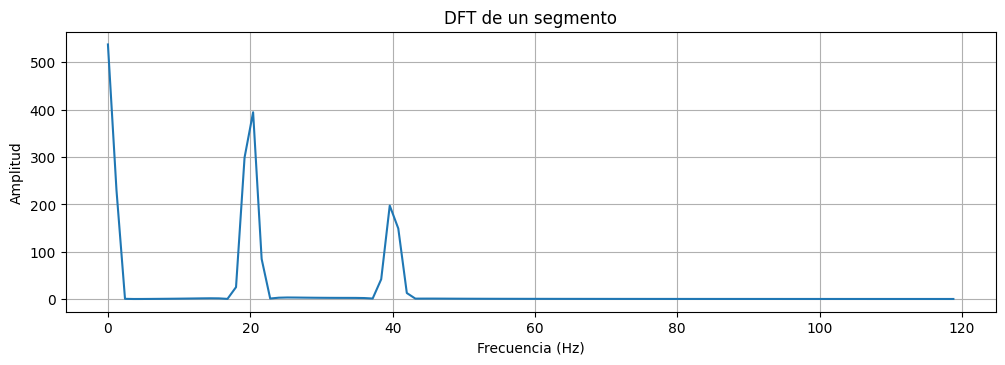

In [27]:
def transformada_fourier(segmento, M, fs):
    ventana = np.hamming(M)
    segmento_enventanado = segmento * ventana
    fft_segmento = np.fft.fft(segmento_enventanado)
    frecuencias = np.fft.fftfreq(M, d=1/fs)
    return fft_segmento, frecuencias


resultados = [transformada_fourier(segmento, M, fs) for segmento in segmentos]
dfT_segmentos = [resultado[0] for resultado in resultados]  # FFTs
frecuencias = resultados[0][1]

# Graficar la DFT del primer segmento
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(frecuencias[:M // 2], np.abs(dfT_segmentos[0])[:M // 2])
plt.title('DFT de un segmento')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()


C) De la transformada de cada segmento obtener el periodograma modificado (5%)

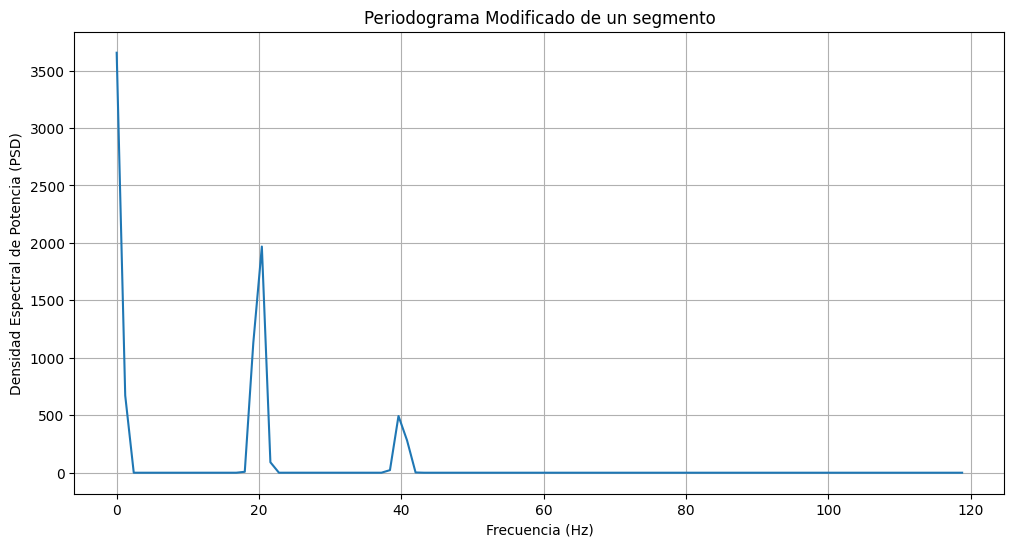

In [28]:
def periodograma_modificado(dfT_segmentos, ventana):
    W = np.sum(ventana ** 2)
    periodogramas = [(1 / W) * (np.abs(dft) ** 2) for dft in dfT_segmentos]
    return periodogramas

ventana = np.hamming(M)
periodogramas_modificados = periodograma_modificado(dfT_segmentos, ventana)

plt.figure(figsize=(12, 6))
plt.plot(frecuencias[:M // 2], periodogramas_modificados[0][:M // 2])
plt.title('Periodograma Modificado de un segmento')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia (PSD)')
plt.grid()
plt.show()



D) Promediar los periodogramas modificados (5%)

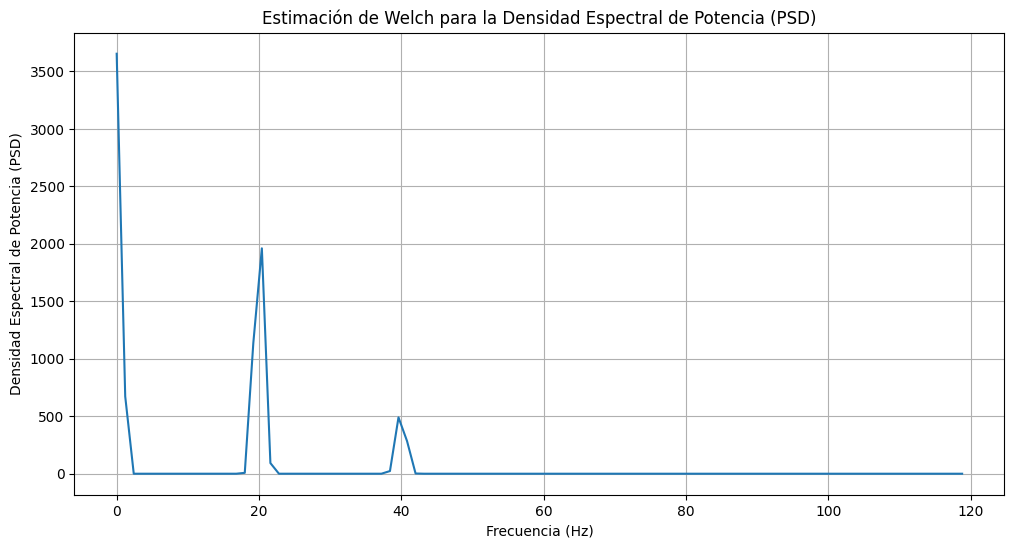

In [30]:
def calcular_promedio_periodogramas(periodogramas_modificados):
    promedio = np.mean(periodogramas_modificados, axis=0)  # Promedio sobre los segmentos
    return promedio

promedio_psd = calcular_promedio_periodogramas(periodogramas_modificados)

plt.figure(figsize=(12, 6))
plt.plot(frecuencias[:M // 2], promedio_psd[:M // 2])
plt.title('Estimación de Welch para la Densidad Espectral de Potencia (PSD)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia (PSD)')
plt.grid()
plt.show()


Prueba